# Semana 6

## FSC5705 - Física Computacional
## 13/09/2023

### Atenção
- **Não esqueça de reiniciar o kernel e rodar todas as células para testar o notebook antes de enviar.**

### Item 1: Oscilador anarmônico

É possível determinar o período de oscilação de um oscilador, mesmo quando ele é *anarmônico* – quando o potencial $V(x)$ não é quadrático – através da equação da conservação da energia mecânica. Se a partícula tem massa $m$, sua
energia é dada por

$$
E = \frac{1}{2} m \left( \frac{\mathrm{d}x}{\mathrm{d}t} \right)^2 + V(x).
$$

Como a energia deve ser constante no tempo, essa equação é uma equação diferencial ligando $x$ e $t$. Vamos admitir que o potencial é simétrico com respeito a $x = 0$ e que, no tempo $t=0$, a partícula parte do repouso com uma posição inicial $x=x_0$, que será a amplitude do movimento. Então em $t=0$ temos $\frac{\mathrm{d}x}{\mathrm{d}t} = 0$, e a equação acima pode ser escrita como $E = V(x_0)$, que dá a energia total em função da amplitude.

Quando a partícula atinge a origem pela primeira vez, ela passou por um quarto do período de oscilação. Rearranjando a equação acima, e integrando com respeito a $t$ de $0$ até $\frac 1 4 T$, pode-se mostrar que o período $T$ é dado por

$$
T = \sqrt{8m} \int_0^{x_0} \frac{\mathrm{d}x}{\sqrt{V(x_0) - V(x)}}.
$$

**a.** Suponha que o potencial seja
$$
V(x) = m g L (1 - \cos x),
$$

correspondente ao pêndulo simples, onde $x$ é o ângulo do pêndulo em relação à vertical. Considere $m = g = L = 1$ para simplificar os cálculos.

Calcule o período de oscilação do pêndulo, usando quadratura gaussiana, quando $x_0 = 0.01$. Nesta amplitude, esperamos nos aproximar do caso de pequenas oscilações, reduzindo o problema a um oscilador harmônico com período constante de

$$
T_\mathrm{PO} = 2\pi \sqrt{\frac L g}.
$$

Mostre o período calculado, e o erro relativo entre o período calculado e $T_\mathrm{PO}$.

*Atenção:*
- O integrando não depende apenas de $x$, também depende da amplitude $x_0$, que também é o limite de integração.
- O integrando diverge quando $x \to x_0$. Neste caso particular a integral converge.

In [79]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import roots_legendre
plt.rcParams['font.family'] = 'serif'
plt.rcParams['mathtext.fontset'] = 'stix'

In [80]:
m = g = L = 1

In [81]:
a = 0
x0 = 0.01
N = 100

def V(x):
    return m*g*L*(1- np.cos(x))


def Period(func,a,b,N):

    u,w = roots_legendre(N)
    
    alpha = 0.5* (b-a)
    beta = 0.5 * (b+a)

    ww = alpha * w
    uu = alpha * u + beta

    soma = np.sum(ww * (1/(np.sqrt(func(b) - func(uu)))))
    T = np.sqrt(8*m) * soma

    return T

Tp0 = 2*np.pi
E = np.abs((Period(V,a,x0,N) - Tp0)/(Tp0))*100

print(f"Período calculado é: {Period(V,a,x0,N)}")
print(f"Período de referência {Tp0}")
print(f"Erro relativo: {E:.3f} %")

Período calculado é: 6.258720088230966
Período de referência 6.283185307179586
Erro relativo: 0.389 %


**b.** Faça um gráfico do período contra a amplitude inicial ($T \times x_0$), para $0 < x_0 < \pi$. Desenhe também uma linha marcando a amplitude do oscilador harmônico, para comparação.

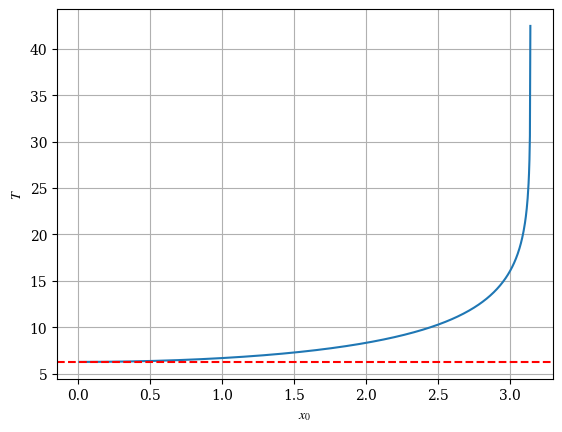

In [82]:
xx0 = np.linspace(0.01,np.pi,1000)

lista_T = np.zeros(len(xx0))

for i in range(len(xx0)):

    lista_T[i] = Period(V,a,xx0[i],N)

fig, ax = plt.subplots(1,1)

ax.plot(xx0,lista_T)
ax.axhline(2*np.pi, ls = "--", color = "red")
ax.set_xlabel("$x_{0}$")
ax.set_ylabel("$T$")
ax.grid()

### Item 2

As funções de Bessel, na sua forma integral, são dadas por

$$
J_m(x) = \frac 1 \pi \int_0^\pi \cos \left( m\theta - x \sin \theta \right)\ \mathrm{d}\theta,
$$

onde $m$ é um inteiro não negativo, e $x \geq 0$.

Escreva uma função que calcule o valor de $J_m(x)$ usando o método de quadratura gaussiana (use $N=20$). Use sua função para fazer um gráfico comparando $J_0$, $J_1$ e $J_2$ (no mesmo gráfico), com $0 \leq x \leq 20$.

In [83]:
from scipy.special import jv

In [84]:
def JS(x,m):
    
    N = 20
    u,w = roots_legendre(N)
    a = 0
    b = np.pi
    
    alpha = 0.5 * (b-a)
    beta = 0.5 * (b+a)

    ww = alpha * w
    uu = alpha * u + beta

    def integrando(theta):
        return np.cos(m*theta - x*np.sin(theta))

    soma = np.sum(ww * integrando(uu))
    J = (1/np.pi)*soma

    return J

x_ = np.linspace(0,20,1000)

J0 = np.zeros(len(x_))
J1 = np.zeros(len(x_))
J2 = np.zeros(len(x_))

m = [0,1,2]
J = [J0,J1,J2]

for i in range(len(m)):

    JJ = J[i]
    for k in range(len(x_)):

        JJ[k] = JS(x_[k],m[i])
    


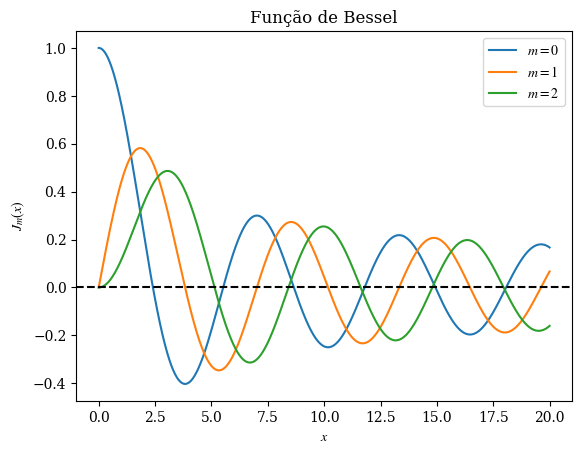

In [86]:
fig, ax = plt.subplots(1,1)

ax.plot(x_,J0, label = "$m = 0$")
ax.plot(x_,J1, label = "$m = 1$")
ax.plot(x_,J2,label = "$m = 2$")
ax.axhline(0,0, ls = "--", color = "black")
ax.set_xlabel("$x$")
ax.set_ylabel("$J_{m}(x)$")
ax.set_title("Função de Bessel")
ax.legend()